In [3]:
# Authors: Eric Larson <larson.eric.d@gmail.com>
#          Chris Holdgraf <choldgraf@gmail.com>
#
# License: BSD (3-clause)

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pickle
import seaborn as sns
import mne
import nilearn.plotting as nl
import pandas as pd


print(__doc__)

/home/ungzs10/miniconda3/envs/ecog01/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


Automatically created module for IPython interactive environment


In [4]:
pat_ids = {
    'EC01':'a0f66459',
    'EC02':'c95c1e82',
    'EC03':'cb46fd46',
    'EC04':'fcb01f7a',
    'EC05':'ffb52f92',
    'EC06':'b4ac1726',
    'EC07':'f3b79359',
    'EC08':'ec761078',
    'EC09':'f0bbc9a9',
    'EC10':'abdb496b',
    'EC11':'ec168864',
    'EC12':'b45e3f7b'
}

pats_ids_in = pat_ids.keys()


In [15]:
lp_base = '/media/ungzs10/F8426F05426EC7C8/Zsombi/MTA/ecog/trained_models/svm/HTNet_data/cikk/64_grid/'
#lp = 'cikk/all_features_greedy/accs_all.pkl'
#lp = 'cikk/64_grid_decreased_ranges/accs_all.pkl'
lp = 'accs_all.pkl'

file = open(lp_base+lp, 'rb')
res_all = pickle.load(file)
file.close()

for i, pat_id in enumerate(pat_ids):
#for i, pat_id in enumerate(['EC01']):
    file = '/media/ungzs10/F8426F05426EC7C8/Zsombi/MTA/ecog/data/raw_data/naturalistic_move_v_rest/electrode_locations/ecog_metadata_{}.csv'.format(pat_ids[pat_id])
    df = pd.read_csv(file)
    ch_names = df['Unnamed: 0'].values.tolist()
    elec = np.asarray([[x,y,z] for x,y,z in zip(df['X'], df['Y'], df['Z'])])

    selected_elecs = res_all[pat_id]['greedy'][2]
    elec_all = elec[:63, :]
    elec_selected = elec[selected_elecs,:]

    nl.plot_connectome(adjacency_matrix=np.eye(elec_all.shape[0]),
                   node_coords=elec_all,
                   node_size=30,
                   node_color=sns.color_palette('deep')[7],
                   title='patient: ' + pat_id,
                   figure=i,
                   display_mode='xz',
                   )
    nl.plot_connectome(adjacency_matrix=np.eye(elec_selected.shape[0]),
                       node_coords=elec_selected,
                       node_color=sns.color_palette('deep')[3],
                       node_size=50,
                       title='patient: ' + pat_id,
                       figure=i,
                       display_mode='xz',
                       output_file='/media/ungzs10/F8426F05426EC7C8/Zsombi/MTA/ecog/analysis/move_vs_rest/figs/greedy_selected/{}.png'.format(pat_id)
                       )

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/home/ungzs10/miniconda3/envs/ecog01/lib/python3.8/site-packages/nilearn/plotting/displays.py:677: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future beha

(0.8666666666666667, 0.5176470588235295, 0.3215686274509804)


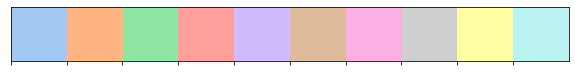

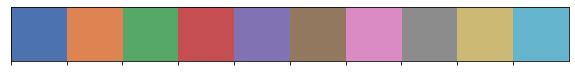

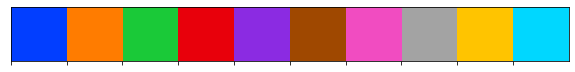

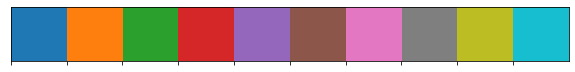

In [6]:
sns.palplot(sns.color_palette('pastel'))
sns.palplot(sns.color_palette('deep'))
print(sns.color_palette('deep')[1])
sns.palplot(sns.color_palette('bright'))
sns.palplot(sns.color_palette())

In [10]:
'''
# read accuracies from file
file = open('/media/ungzs10/F8426F05426EC7C8/Zsombi/MTA/ecog/trained_models/svm/HTNet_data/del/accs_all.pkl', 'rb')
res_all = pickle.load(file)
file.close()

# plot with color
for pat_id in pat_ids:
    # read electrode locations from file
    file = '/media/ungzs10/F8426F05426EC7C8/Zsombi/MTA/ecog/data/raw_data/naturalistic_move_v_rest/electrode_locations/ecog_metadata_{}.csv'.format(pat_ids[pat_id])
    df = pd.read_csv(file)
    ch_names = df['Unnamed: 0'].values.tolist()
    elec = np.asarray([[x,y,z] for x,y,z in zip(df['X'], df['Y'], df['Z'])])

    # select electrodes by hand
    selected_elecs = [0,1,2,3,4,5,6,7,8]
    elec_temp = elec[selected_elecs,:]

    nl.plot_connectome(adjacency_matrix=np.eye(elec_temp.shape[0]),
                       node_coords=elec_temp,
                       title=pat_id+' channels: '+str(len(selected_elecs))+' acc: '
                             +str(round(res_all[pat_id]['greedy'][1][-1], 2))
                       )
'''

"\n# read accuracies from file\nfile = open('/media/ungzs10/F8426F05426EC7C8/Zsombi/MTA/ecog/trained_models/svm/HTNet_data/del/accs_all.pkl', 'rb')\nres_all = pickle.load(file)\nfile.close()\n\n# plot with color\nfor pat_id in pat_ids:\n    # read electrode locations from file\n    file = '/media/ungzs10/F8426F05426EC7C8/Zsombi/MTA/ecog/data/raw_data/naturalistic_move_v_rest/electrode_locations/ecog_metadata_{}.csv'.format(pat_ids[pat_id])\n    df = pd.read_csv(file)\n    ch_names = df['Unnamed: 0'].values.tolist()\n    elec = np.asarray([[x,y,z] for x,y,z in zip(df['X'], df['Y'], df['Z'])])\n\n    # select electrodes by hand\n    selected_elecs = [0,1,2,3,4,5,6,7,8]\n    elec_temp = elec[selected_elecs,:]\n\n    nl.plot_connectome(adjacency_matrix=np.eye(elec_temp.shape[0]),\n                       node_coords=elec_temp,\n                       title=pat_id+' channels: '+str(len(selected_elecs))+' acc: '\n                             +str(round(res_all[pat_id]['greedy'][1][-1], 2))\n 

In [22]:
file = open('/media/ungzs10/F8426F05426EC7C8/Zsombi/MTA/ecog/trained_models/svm/HTNet_data/single_features/accs_all.pkl', 'rb')
res_all = pickle.load(file)
file.close()

for i, pat_id in enumerate(pat_ids):
#for i, pat_id in enumerate(['EC07']):
    file = '/media/ungzs10/F8426F05426EC7C8/Zsombi/MTA/ecog/data/raw_data/naturalistic_move_v_rest/electrode_locations/ecog_metadata_{}.csv'.format(pat_ids[pat_id])
    df = pd.read_csv(file)
    ch_names = df['Unnamed: 0'].values.tolist()
    elec = np.asarray([[x,y,z] for x,y,z in zip(df['X'], df['Y'], df['Z'])])
    elec = elec[:64,:]

    #selected_elecs = res_all[pat_id]['greedy'][2]
    #elec_temp = elec[selected_elecs,:]
    weights = [res for res in res_all[pat_id]['all_features']['test']['result']]
    #weights = np.asarray(weights)
    #norm = np.linalg.norm(weights)
    #weights_norm = weights/norm
    color = [[w, 0, 0, 1] for w in weights]
    while len(weights) < len(ch_names):
        color.append([0,0,0,1])
        weights.append(0)
        #print(pat_id)

    '''nl.plot_connectome(adjacency_matrix=np.eye(elec.shape[0]),
                       node_coords=elec,
                       node_color=weights[:64],
                       title=pat_id)'''
    nl.plot_connectome(adjacency_matrix=np.eye(elec.shape[0]),
                   node_coords=elec,
                   node_size=40,
                   alpha=.4,
                   display_mode='xz',
                   node_color='grey',
                   figure=i,
                   )

    nl.plot_markers(#adjacency_matrix=np.eye(elec.shape[0]),
                node_coords=elec,
                node_values=weights[:64],
                node_size=30,
                display_mode='xz',
                alpha=1,
                #node_cmap='Spectral',
                #node_cmap=sns.color_palette("OrRd", as_cmap=True),
                node_cmap=sns.light_palette(sns.color_palette('deep')[3],
                                            n_colors=20,
                                            reverse=False, as_cmap=True,
                                            input='rgb'),
                figure=i,
                title='patient ID: '+pat_id,
                output_file='/media/ungzs10/F8426F05426EC7C8/Zsombi/MTA/ecog/analysis/move_vs_rest/figs/single_ch_acc/single_{}.png'.format(pat_id),
                #colorbar=True)
    )



/home/ungzs10/miniconda3/envs/ecog01/lib/python3.8/site-packages/nilearn/plotting/displays.py:677: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = figure.add_axes(axes)
/home/ungzs10/miniconda3/envs/ecog01/lib/python3.8/site-packages/nilearn/plotting/displays.py:1243: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fh.add_axes([0.3 * index * (x1 - x0) + x0, y0,
